# Applying a Entailemnt Internalization

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from IPython.display import HTML, display

# load data

In [2]:
result_path = "results/snli_lr_Tfidf_ent_int.csv"
result = pd.read_csv(result_path).set_index("pcts")

## Plots

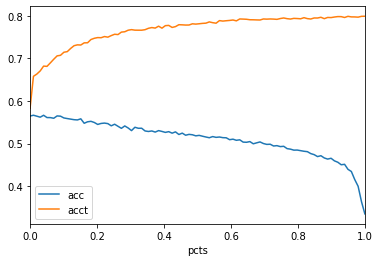

In [3]:
result[["acc", 'acct']].plot();

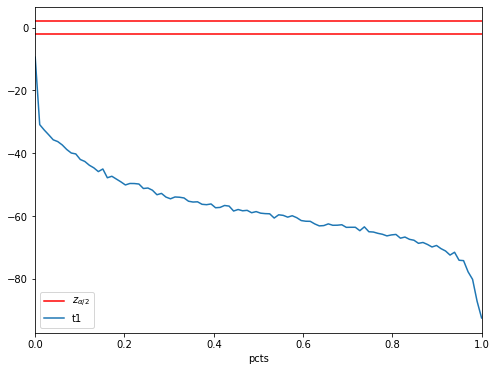

In [4]:
alpha = 0.05
z_alpha_2 =  scipy.stats.norm.ppf(1  - (alpha/2))
paired_t_reject_H0 = result.t1.apply(np.abs) > z_alpha_2
paired_t_reject_H0 = paired_t_reject_H0.apply(lambda x: "reject H0" if x else "retain  H0")
paired_t_reject_H0.name = "paired_t"

fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.axhline(y=z_alpha_2, color='r', linestyle='-', label=r"$z_{\alpha/2}$")
plt.axhline(y=-z_alpha_2, color='r', linestyle='-')
result[["t1"]].plot(ax=ax);
plt.legend(loc="best");

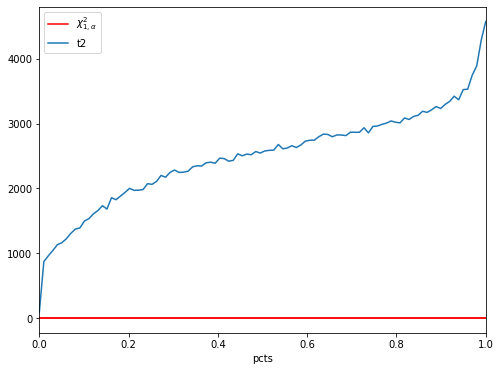

In [5]:
chi_2_alpha =  scipy.stats.chi2.ppf(1 - alpha, df=1)
cochran_reject_H0 = result.t2 > chi_2_alpha
cochran_reject_H0 = cochran_reject_H0.apply(lambda x: "reject H0" if x else "retain  H0")
cochran_reject_H0.name = "cochran"

fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.axhline(y=chi_2_alpha, color='r', linestyle='-', label=r"$\chi^{2}_{1,\alpha}$")
plt.axhline(y=0, color='r', linestyle='-')
result[["t2"]].plot(ax=ax);
plt.legend(loc="best");

## Tests
### basic info

In [6]:
tests = pd.DataFrame([paired_t_reject_H0, cochran_reject_H0]).transpose()
disagreement = tests[~ (tests.cochran == tests.paired_t)]
display(HTML(tests.cochran.value_counts().to_frame().to_html()))
display(HTML(tests.paired_t.value_counts().to_frame().to_html()))
display(HTML(disagreement.to_html()))

,cochran
reject H0,100


,paired_t
reject H0,100


,paired_t,cochran
pcts,,


### p-values

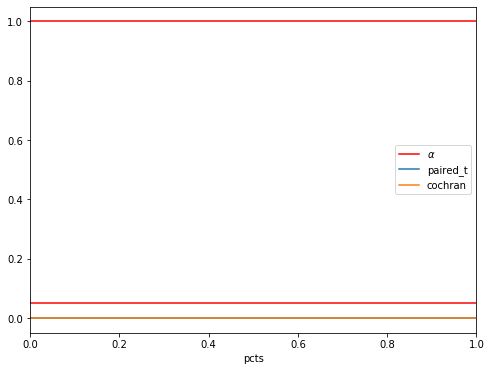

In [7]:
p_normal = lambda x: 2*scipy.stats.norm.cdf(- np.abs(x))
p_chi2 = lambda x: 1 - scipy.stats.chi2.cdf(x, df=1)
p_t1 = result.t1.map(p_normal)
p_t1.name = "paired_t"
p_t2 = result.t2.map(p_chi2)
p_t2.name = "cochran"
p_values = pd.DataFrame([p_t1, p_t2]).transpose()

fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=alpha, color='r', linestyle='-', label=r"$\alpha$")
p_values.plot(ax=ax);
plt.legend(loc="best");

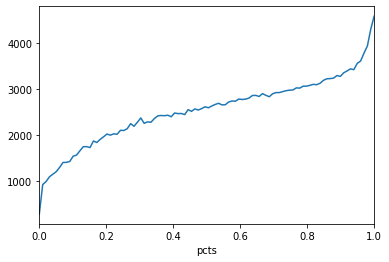

In [14]:
result.E.plot()